## 2.6. Probability and Statistics
https://d2l.ai/chapter_preliminaries/probability.html


## (1) Gi·∫£m ph∆∞∆°ng sai khi s·ªë l·∫ßn quan s√°t n tƒÉng l√™n

## (2) Ki·ªÉm nghi·ªám b·∫•t ƒë·∫≥ng th·ª©c Chebyshev

## (3) Ki·ªÉm nghi·ªám ƒê·ªãnh l√Ω Gi·ªõi h·∫°n Trung t√¢m (CLT)

## 2.6.8. Exercises 3

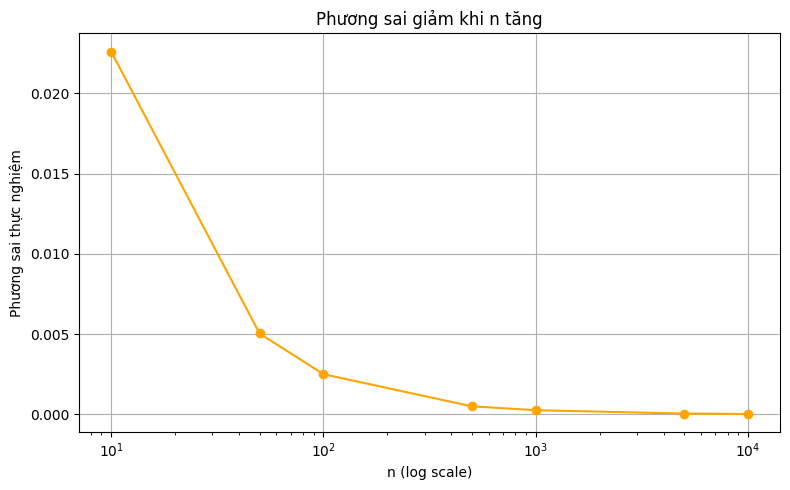

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Thi·∫øt l·∫≠p h·∫°t gi·ªëng ƒë·ªÉ t√°i l·∫≠p k·∫øt qu·∫£
np.random.seed(42)

# Th√¥ng s·ªë chung
p = 0.5                    # X√°c su·∫•t m·∫∑t ng·ª≠a
eps = 0.05                 # Ng∆∞·ª°ng epsilon cho Chebyshev
n_values = [10, 50, 100, 500, 1000, 5000, 10000]  # C√°c gi√° tr·ªã n
num_trials = 1000         # S·ªë l·∫ßn m√¥ ph·ªèng cho m·ªói n

# Danh s√°ch l∆∞u k·∫øt qu·∫£
variances = []
chebyshev_bounds = []
chebyshev_empirical = []

# V√≤ng l·∫∑p qua c√°c gi√° tr·ªã n
for n in n_values:
    # Sinh num_trials m·∫´u Bernoulli, m·ªói m·∫´u c√≥ n quan s√°t
    samples = np.random.binomial(1, p, (num_trials, n))
    
    # T√≠nh ∆∞·ªõc l∆∞·ª£ng pÃÇ
    estimates = np.mean(samples, axis=1)
    
    # 1. T√≠nh ph∆∞∆°ng sai th·ª±c nghi·ªám
    var_empirical = np.var(estimates)
    variances.append(var_empirical)
    
    # 2. Ki·ªÉm nghi·ªám Chebyshev
    cheb_bound = p * (1 - p) / (n * eps**2)
    chebyshev_bounds.append(cheb_bound)
    
    cheb_actual = np.mean(np.abs(estimates - p) >= eps)
    chebyshev_empirical.append(cheb_actual)

# 3. Ki·ªÉm nghi·ªám CLT v·ªõi n l·ªõn
n_clt = 1000
samples_clt = np.random.binomial(1, p, (num_trials, n_clt))
estimates_clt = np.mean(samples_clt, axis=1)
z_scores = np.sqrt(n_clt) * (estimates_clt - p)

# ===============================================
# V·∫º C√ÅC BI·ªÇU ƒê·ªí TR·ª∞C QUAN H√ìA K·∫æT QU·∫¢ T√çNH TO√ÅN
# ===============================================

# Bi·ªÉu ƒë·ªì 1: Gi·∫£m ph∆∞∆°ng sai theo n
plt.figure(figsize=(8,5))
plt.plot(n_values, variances, marker='o', color='orange')
plt.xscale("log")
plt.xlabel("n (log scale)")
plt.ylabel("Ph∆∞∆°ng sai th·ª±c nghi·ªám")
plt.title("Ph∆∞∆°ng sai gi·∫£m khi n tƒÉng")
plt.grid(True)
plt.tight_layout()
plt.show()



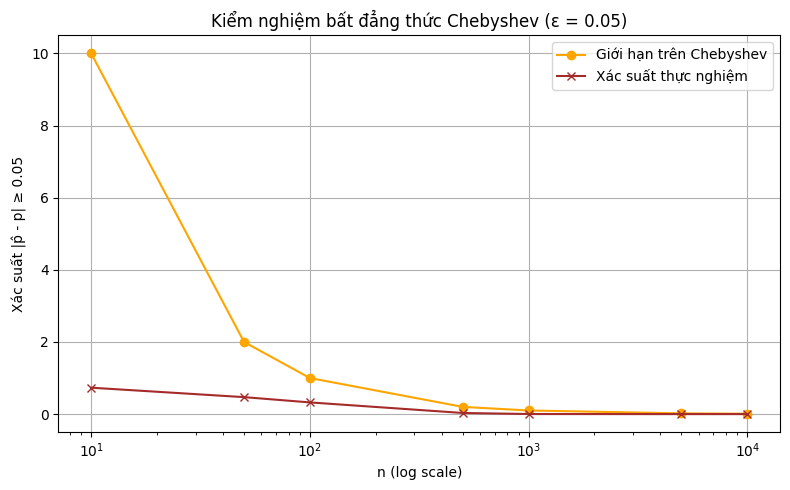

In [13]:
# Bi·ªÉu ƒë·ªì 2: Ki·ªÉm nghi·ªám BƒêT Chebyshev
plt.figure(figsize=(8,5))
plt.plot(n_values, chebyshev_bounds, label="Gi·ªõi h·∫°n tr√™n Chebyshev", marker='o', color='orange')
plt.plot(n_values, chebyshev_empirical, label="X√°c su·∫•t th·ª±c nghi·ªám", marker='x', color='brown')
plt.xscale("log")
plt.xlabel("n (log scale)")
plt.ylabel(f"X√°c su·∫•t |pÃÇ - p| ‚â• {eps}")
plt.title(f"Ki·ªÉm nghi·ªám b·∫•t ƒë·∫≥ng th·ª©c Chebyshev (Œµ = {eps})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




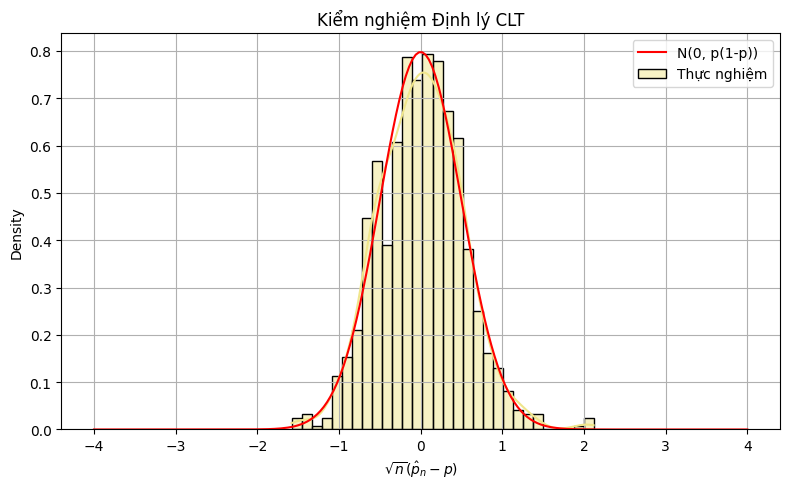

In [14]:
# Bi·ªÉu ƒë·ªì 3: Histogram ki·ªÉm nghi·ªám CLT
plt.figure(figsize=(8,5))
sns.histplot(z_scores, bins=30, kde=True, stat="density", label="Th·ª±c nghi·ªám", color='khaki', edgecolor='black')
x = np.linspace(-4, 4, 200)
plt.plot(x, norm.pdf(x, 0, np.sqrt(p*(1-p))), label="N(0, p(1-p))", color='red')
plt.xlabel(r"$\sqrt{n}(\hat{p}_n - p)$")
plt.title("Ki·ªÉm nghi·ªám ƒê·ªãnh l√Ω CLT")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Ki·ªÉm nghi·ªám ƒê·ªãnh l√Ω Gi·ªõi h·∫°n Trung t√¢m (CLT) v·ªõi c√°c gi√° tr·ªã x√°c su·∫•t kh√°c nhau: ùëù = 0.1, 0.3, 0.5, 0.7, 0.9

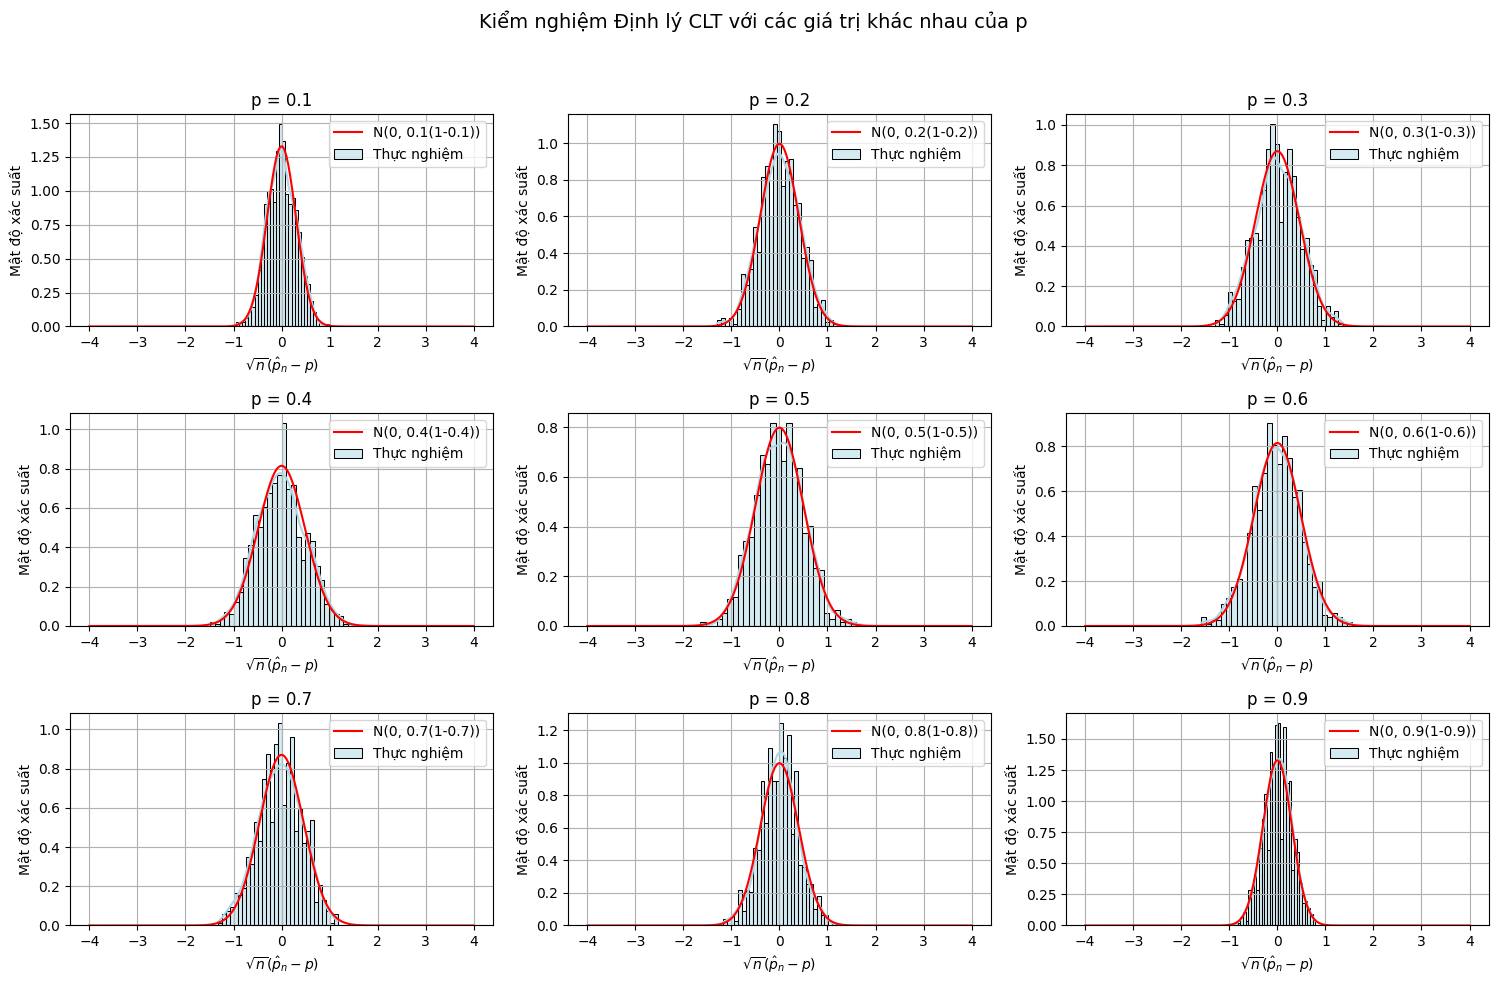

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# C√°c gi√° tr·ªã p ƒë·ªÉ ki·ªÉm nghi·ªám
p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
n_clt = 1000        # S·ªë l·∫ßn quan s√°t
num_trials = 1000   # S·ªë l·∫ßn m√¥ ph·ªèng

# T·∫°o l∆∞·ªõi 3x3 ƒë·ªÉ ƒë·ªß 9 bi·ªÉu ƒë·ªì
plt.figure(figsize=(15, 10))

for i, p in enumerate(p_values, 1):
    samples = np.random.binomial(1, p, (num_trials, n_clt))
    estimates = np.mean(samples, axis=1)
    z_scores = np.sqrt(n_clt) * (estimates - p)

    plt.subplot(3, 3, i)  # L∆∞·ªõi 3 h√†ng x 3 c·ªôt
    sns.histplot(z_scores, bins=30, kde=True, stat="density",
                 color='lightblue', edgecolor='black', label="Th·ª±c nghi·ªám")

    x = np.linspace(-4, 4, 200)
    std_dev = np.sqrt(p * (1 - p))
    plt.plot(x, norm.pdf(x, 0, std_dev), 'r-', label=f'N(0, {p}(1-{p}))')

    plt.title(f"p = {p}")
    plt.xlabel(r"$\sqrt{n}(\hat{p}_n - p)$")
    plt.ylabel("M·∫≠t ƒë·ªô x√°c su·∫•t")
    plt.legend()
    plt.grid(True)

plt.suptitle("Ki·ªÉm nghi·ªám ƒê·ªãnh l√Ω CLT v·ªõi c√°c gi√° tr·ªã kh√°c nhau c·ªßa p", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
